In [1]:
import numpy as np

In [25]:
def center(vector):
    return vector - np.mean(vector)

def normalize(vector):
    total_sum = sum(abs(i) for i in vector)
    return vector / np.linalg.norm(vector)

In [28]:
V1 = normalize(center(np.array([3,2,0,1,0,0,3,2,0])))  #C
V2 = normalize(center(np.array([3, 2, 2, 3, 2, 0, 3, 2, 2] )))  #E
V3 = normalize(center(np.array([1, 0, 1, 3, 2, 3, 1, 0, 1])))  #H
epsilon = 1e-8
V1 += np.random.uniform(-epsilon, epsilon, V1.shape)

In [50]:
V = [V1, V2, V3] 

W = np.matmul(V, np.transpose(V))

A = np.linalg.inv(W)
A

array([[ 1.87869467, -0.94054677,  0.64996396],
       [-0.94054677,  1.55668822, -0.02014546],
       [ 0.64996396, -0.02014546,  1.31067961]])

In [59]:
U1 = np.multiply(A[0],np.transpose(V))
U2 = sum(np.multiply(A[1],np.transpose(V)))
U3 = sum(np.multiply(A[2],np.transpose(V)))
U1

array([[ 0.90714146, -0.31853216, -0.06851222],
       [ 0.3968744 ,  0.03981652, -0.27404887],
       [-0.62365974,  0.03981652, -0.06851222],
       [-0.11339268, -0.31853216,  0.34256109],
       [-0.62365977,  0.03981652,  0.13702443],
       [-0.62365974,  0.75651387,  0.34256109],
       [ 0.90714148, -0.31853216, -0.06851222],
       [ 0.39687439,  0.03981652, -0.27404887],
       [-0.62365976,  0.03981652, -0.06851222]])

In [54]:
np.linalg.det(W)

np.float64(0.49021682687307266)

# Распознавание

In [32]:
J = normalize(center([3,2,3,1,0,0,3,2,3])) # C -|   _|
J=np.round(J,3)

In [33]:
p1 = np.matmul(U1,J)
p2 = np.matmul(U2,J)
p3 = np.matmul(U3,J)

In [34]:
p1, p2, p3

(np.float64(1.4546946609058722),
 np.float64(0.3828935488880587),
 np.float64(-3.359196497274517))

In [47]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
def display(y0, C):    
    def model(t, p):   
        B = 0.5
        dydt = np.zeros(3)        
        for k in range(3):
            dydt[k] = (p[k]                       
                       - B *1* p[k] * sum([pi * pi for i, pi in enumerate(p) if i != k])
                       - C *1* p[k] * sum([pi * pi for i, pi in enumerate(p)]))
        return dydt
    t_span = (0, 10)    
    t_eval = np.linspace(t_span[0], t_span[1], 100)
    solution = solve_ivp(model, t_span, y0, t_eval=t_eval)
    start = 1
    plt.plot(solution.t[start:], solution.y[0][start:], label='C')
    plt.plot(solution.t[start:], solution.y[1][start:], label='E')    
    plt.plot(solution.t[start:], solution.y[2][start:], label='H')
    plt.xlabel('Время t')    
    plt.ylabel('y')
    plt.title('Графики')    
    plt.legend()
    plt.grid()    
    plt.show()


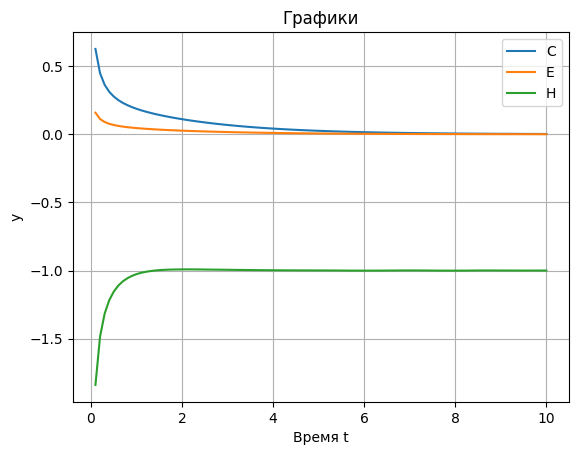

In [48]:
display([p1, p2, p3], 1)